# `Problem Statement`

Through a real-world challenge, this hackathon aims to enhance competitors' data science and innovative analytical thinking abilities. Get an opportunity to work on a remarkable data science technology by competing with the best brains in this area at this point in time, where artificial intelligence and machine learning are at the forefront of attention, and find out how you stack up!

This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. Using this dataset, the participants need to build machine learning models for predicting the trip fare based on the given other useful features of the trip.

Overall, it involves using a dataset, finding the best set of features from the dataset, building a machine learning model to predict trip fare based on other trip features and evaluating the predictions using mean squared error and finally submitting the predictions in the given template.

* Trip_distance: The elapsed trip distance in miles reported by the taximeter.
* Rate_code: The final rate code is in effect at the end of the trip. 1= Standard rate,2=JFK,3=Newark, 4=Nassau or Westchester, 5=Negotiated fare,6=Group ride
* Storeandfwd_flag: This flag indicates whether the trip record was held in vehicle memory before sending it to the vendor and determines if the trip was stored in the server and forwarded to the vendor. Y= store and forward trip N= not a store and forward trip
* Payment_type: A numeric code signifying how the passenger paid for the trip. 1= Credit card,2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip
* Fare_amount: The time-and-distance fare calculated by the meter
* Extra: Miscellaneous extras and surcharges.
* Mta_tax: 0.50 MTA tax that is automatically triggered based on the metered rate in use.
* Tip_amount: Tip amount credited to the driver for credit card transactions.
* Tolls_amount: Total amount of all tolls paid in the trip.
* Imp_surcharge: 0.30 extra charges added automatically to all rides
* Total_amount: The total amount charged to passengers. Does not include cash tips
* Pickuplocationid: TLC Taxi Zone in which the taximeter was engaged
* Dropofflocationid: TLC Taxi Zone in which the taximeter was disengaged
* Year: The year in which the taxi trip was taken.
* Month: The month on which the taxi trip was taken.
* Day: The day on which the taxi trip was taken.
* Day_of_week: The day of the week on which the taxi trip was taken
* Hour_of_day: Used to determine the hour of the day in 24 hours format
* Trip_duration: The total duration of the trip in seconds
* calculated_total_amount: The total amount the customer has to pay for the taxi.

## `Importing Libreries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import scipy.stats as stats
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

plt.rcParams['figure.figsize']=[12,6]

pd.options.display.max_columns = 100

## `Load Datasets`

In [2]:
# train and submission dataset.

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

# 

In [3]:
# Combine Train and test

combined = pd.concat([train,test],ignore_index=True)

In [4]:
# Checking shape of dataset.

train.shape, test.shape, combined.shape

((35000, 20), (15000, 19), (50000, 20))

In [5]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [6]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            50000 non-null  float64
 1   rate_code                50000 non-null  int64  
 2   store_and_fwd_flag       50000 non-null  object 
 3   payment_type             50000 non-null  int64  
 4   fare_amount              50000 non-null  float64
 5   extra                    50000 non-null  float64
 6   mta_tax                  50000 non-null  float64
 7   tip_amount               50000 non-null  float64
 8   tolls_amount             50000 non-null  float64
 9   imp_surcharge            50000 non-null  float64
 10  total_amount             50000 non-null  float64
 11  pickup_location_id       50000 non-null  int64  
 12  dropoff_location_id      50000 non-null  int64  
 13  year                     50000 non-null  int64  
 14  month                 

# 

## `Univariate Analysis`

#### 1.Numerical

In [7]:
num_cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'imp_surcharge', 'total_amount', 'trip_duration', 'calculated_total_amount']

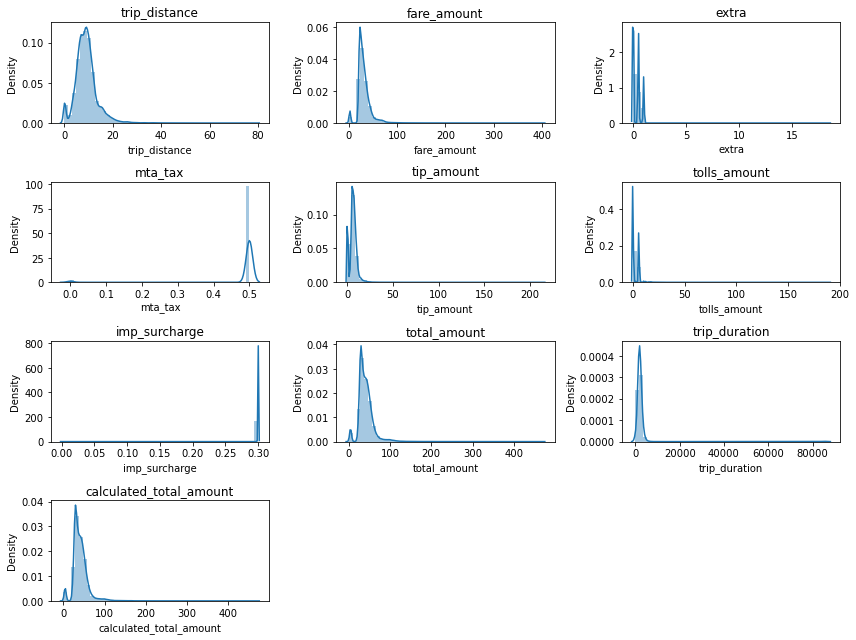

In [8]:
plt.figure(figsize=(12,9))
t = 1
for i in num_cols:
    plt.subplot(4,3,t)
    sns.distplot(combined[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

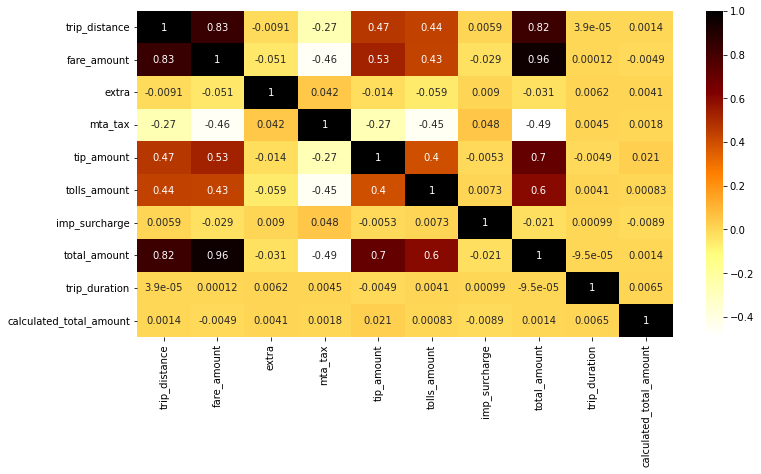

In [9]:
# Check the correlation between numeric columns

sns.heatmap(combined.loc[:,num_cols].corr(),annot = True,cmap = 'afmhot_r')
plt.show()

##### Inference:
* Total amount is directly correlated with trip distance, fare amount, tip amount, tolls amount.

#### 2. Categorical

In [10]:
cat_cols = ['rate_code', 'store_and_fwd_flag', 'payment_type','pickup_location_id',
            'dropoff_location_id', 'year', 'month', 'day', 'day_of_week','hour_of_day']

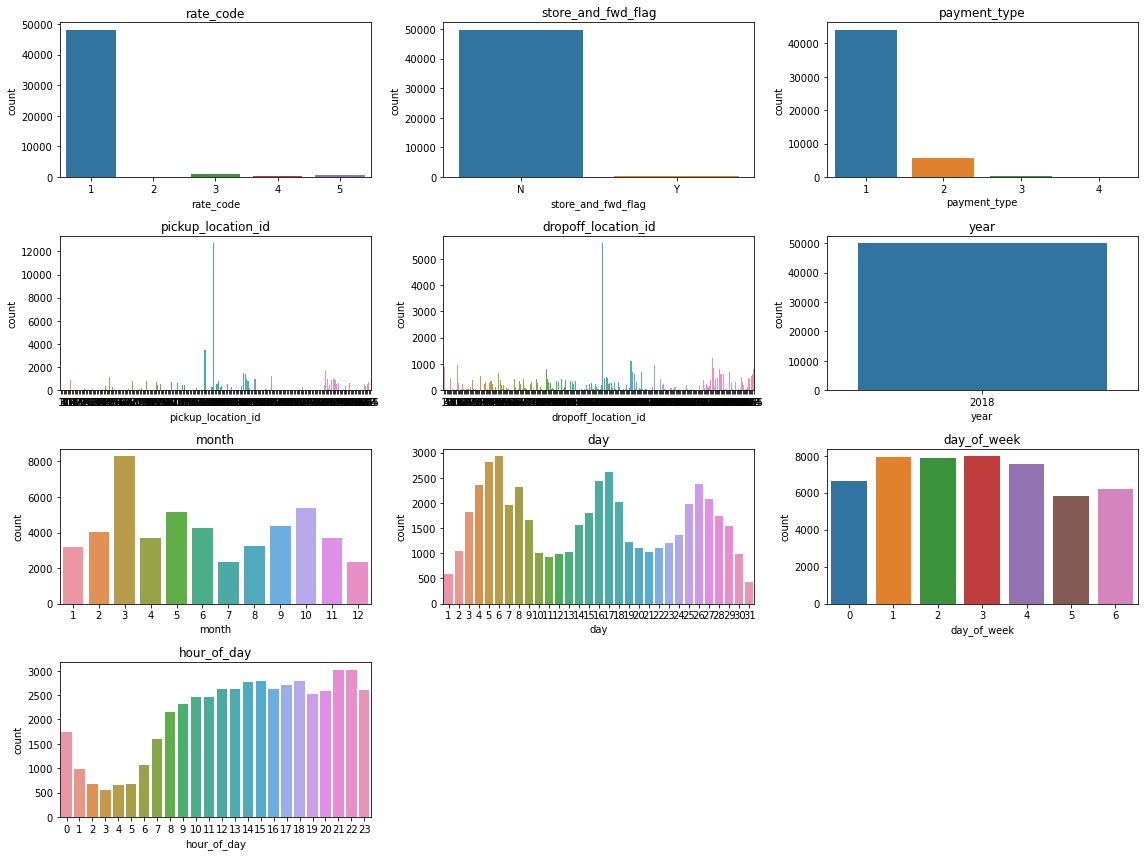

In [11]:
plt.figure(figsize=(16,12))
t = 1
for i in cat_cols:
    plt.subplot(4,3,t)
    sns.countplot(combined[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

##### Inferences:
* Most of the rate_codes are standard.
* Most of the passanger do the payment via credit card.
* This data is only of 2018 year.
* March month is the busiest month.
* 6th, 17th, 26th are the busiest days.
* Monday, Tuesday, Wednesday and Thursday are busy weekday may be due to offices.
* evening and night are more busy the morning and afternoon.

# 

## `Bivariate Analysis`

#### Numeric vs Numeric (target)

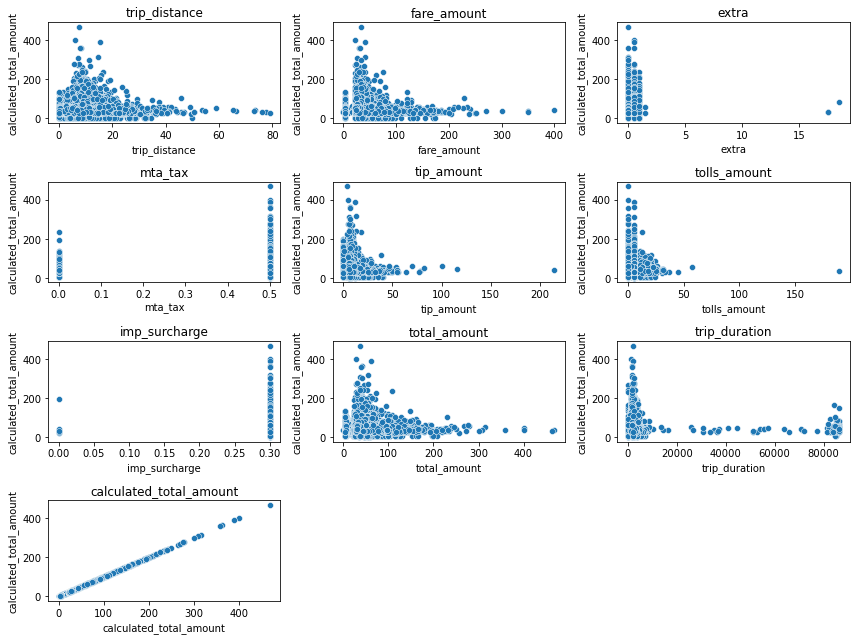

In [12]:
plt.figure(figsize=(12,9))
t = 1
for i in num_cols:
    plt.subplot(4,3,t)
    sns.scatterplot(combined[i],combined.calculated_total_amount)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

**Note:** We will remove the outliers from the data.

#### 2. Categorical vs Numerical (Target)

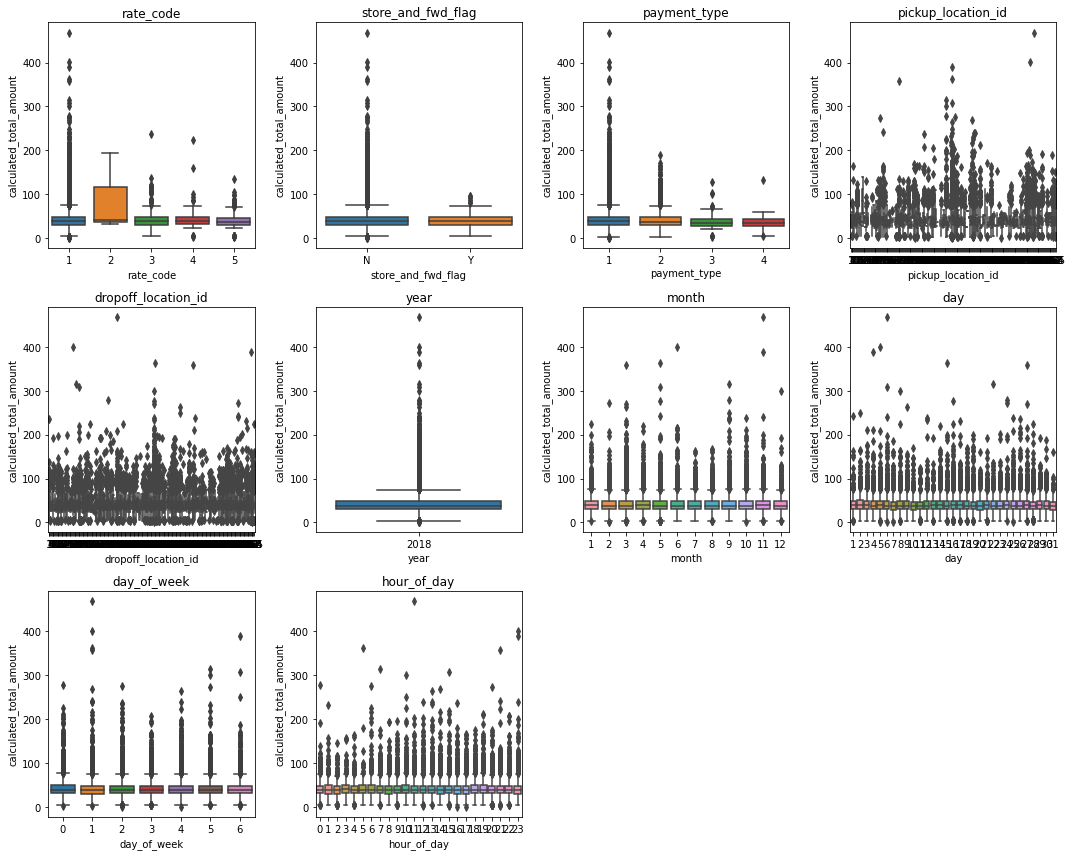

In [13]:
plt.figure(figsize=(15,12))
t = 1
for i in cat_cols:
    plt.subplot(3,4,t)
    sns.boxplot(combined[i],combined.calculated_total_amount)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

# 

## `Feature Engineering`

##### Trip_counts

In [14]:
# trips from location

combined['trip_count']=combined.groupby('pickup_location_id')['dropoff_location_id'].transform('nunique')

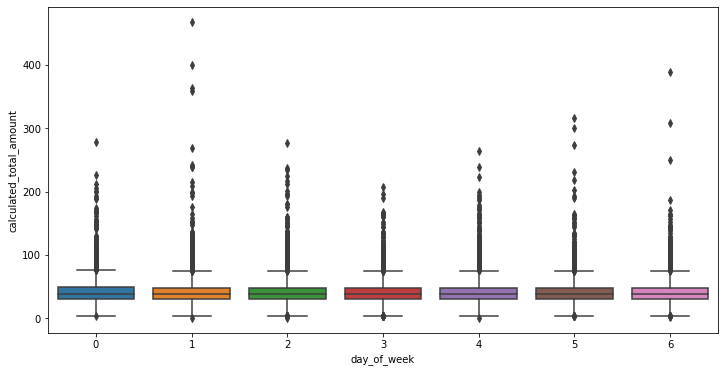

In [15]:
# Plot for Day of the week

sns.boxplot(x ='day_of_week',y='calculated_total_amount', data = combined)
plt.show()

In [16]:
# Statistical Test

model = sfa.ols('calculated_total_amount~trip_count',data = combined).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
trip_count,1.0,2.554032e+03,2554.032124,6.953284,0.00837
Residual,34998.0,1.285522e+07,367.313054,NaN,NaN


Here p value < 0.05, So we rejected the Ho. Thus this feature have an impact on the target variable.

# 

##### Peak hours

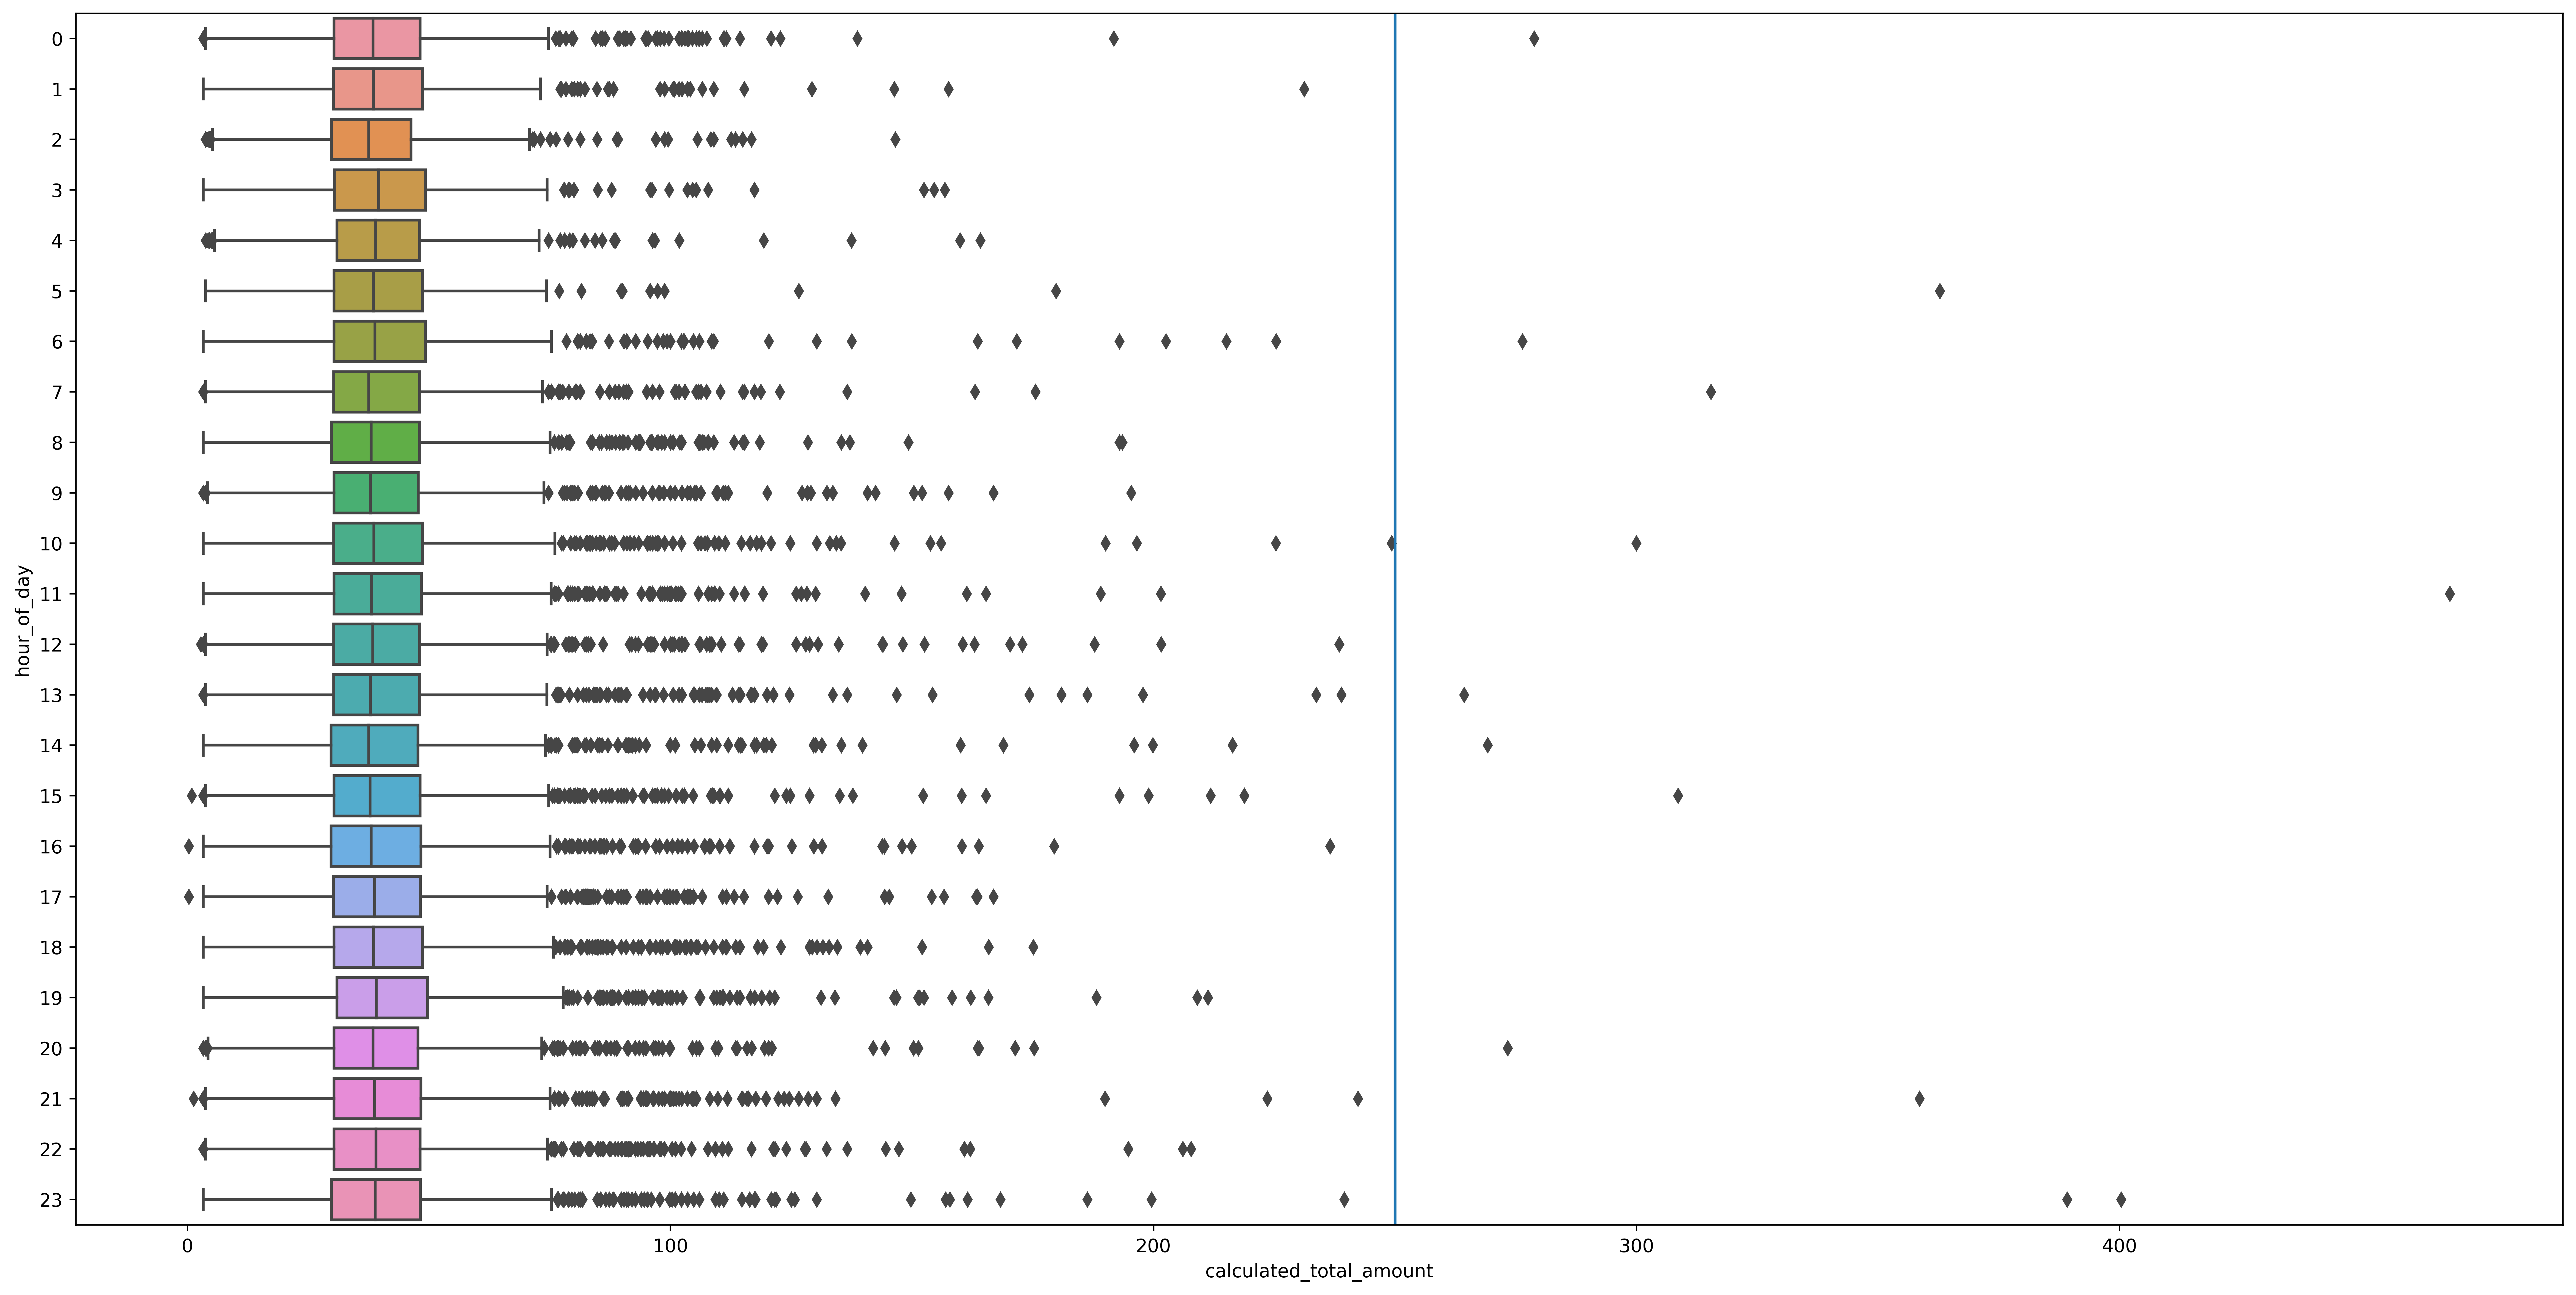

In [17]:
# Plot for Visualization of busy hours.

plt.figure(figsize=(24,12),dpi = 500)
sns.boxplot(y ='hour_of_day',x='calculated_total_amount', data = combined,orient='h')
plt.axvline(x = 250)
plt.show()

Busy hours - 0,5,6,7,10,11,13,14,15,20,21,23

In [18]:
# Peak hours

combined['peak_hours'] = combined.hour_of_day.apply(lambda x: 1 if x in [0,5,6,7,10,11,13,14,15,20,21,23] else 0)

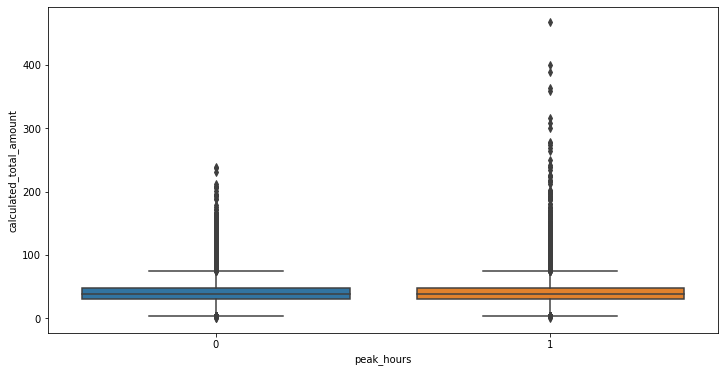

In [19]:
# Plot for peak hours

sns.boxplot(combined.peak_hours, combined.calculated_total_amount)
plt.show()

In [20]:
# Statistical Test

model = sfa.ols('calculated_total_amount~peak_hours',data = combined).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
peak_hours,1.0,5.671369e+01,56.713693,0.154372,0.694395
Residual,34998.0,1.285772e+07,367.384410,NaN,NaN


Here p value > 0.05, So we fail to reject the Ho. Thus this feature have no impact on the target variable. But we know that peak hours effect the fare so we keep this variable.

# 

##### Work hours

In [21]:
# Defining function to create work hours on the basis of hours of day.

def work(x):
    if x<5:
        return ('wee')
    elif x<10:
        return ('office')
    elif x<16:
        return ('lunch')
    else:
        return ('return')

In [22]:
# Work hours

combined['work_hours'] = combined.hour_of_day.apply(work)

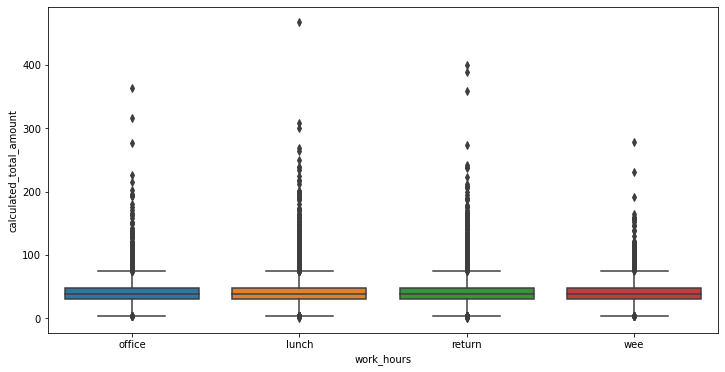

In [23]:
# Plot for work hours

sns.boxplot(combined.work_hours,combined.calculated_total_amount)
plt.show()

In [24]:
# Statistical Test

model = sfa.ols('calculated_total_amount~work_hours',data = combined).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
work_hours,3.0,1.756464e+02,58.548790,0.159359,0.92368
Residual,34996.0,1.285760e+07,367.402007,NaN,NaN


Here p value > 0.05, So we fail to reject the Ho. Thus this feature have no impact on the target variable. But we know that work hours effect the fare so we keep this variable.

# 

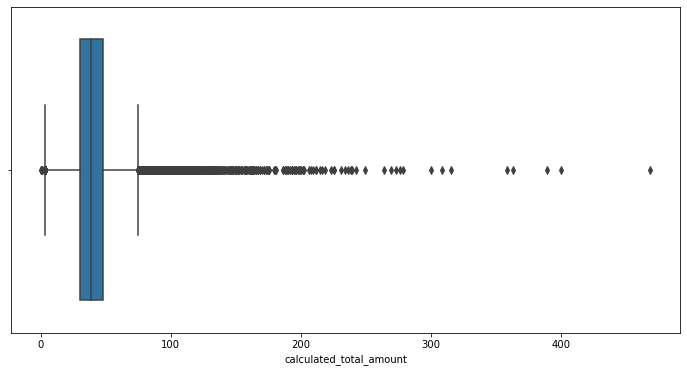

In [25]:
# Remove the outliers

sns.boxplot(combined.calculated_total_amount)
plt.show()

**Note:** We will deal with outliers later.

# 

## Clustering 
##### for new features

In [26]:
# importing libreries for Elbow plot

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans



In [27]:
# clusters for hour of day, day, day of week , month

# KMeans Model defining
kmeans = KMeans(random_state = 42)


# Elbow Visualizer defining
elbow = KElbowVisualizer(estimator = kmeans,random_state=42)


# Taking only month, day, day_of_week, hour_of_day for optimal clusters.
data = combined.loc[:,['month','day','day_of_week','hour_of_day']]

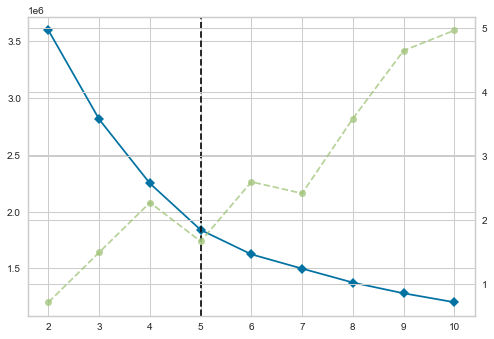

In [28]:
# Elbow plot 

elbow.fit(data)
plt.show()

Gives number of clusters = 5

In [29]:
# Finding labels for 5 clusters.

kmeans = KMeans(n_clusters = 5, random_state=42)
labels = kmeans.fit(data)


# Inserting the labels in the dataset
combined['cluster_labels']=labels.labels_

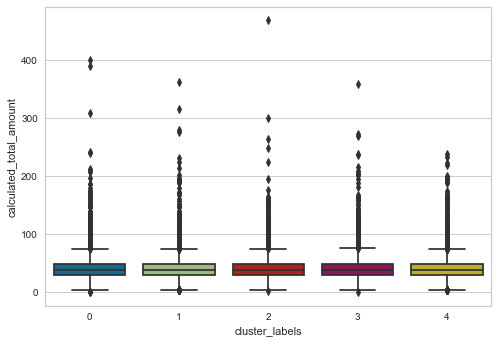

In [30]:
# Plot for visualizing the effect of above cluster labels on target.

sns.boxplot(combined.cluster_labels, combined.calculated_total_amount)
plt.show()

In [31]:
# Statistical Test

model = sfa.ols('calculated_total_amount~cluster_labels',data = combined).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
cluster_labels,1.0,3.537818e+02,353.781776,0.962997,0.32644
Residual,34998.0,1.285742e+07,367.375921,NaN,NaN


Here p value > 0.05, So we fail to reject the Ho. Thus this feature have no impact on the target variable. But from domain knowledge this feature may effect the fare so we keep this variable.

# 

In [32]:
# Cluster for Long and lat

geo_data = combined.loc[:,['pickup_location_id','dropoff_location_id']]

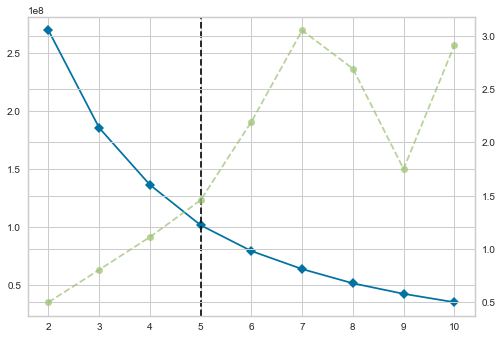

In [33]:
# KMeans Model defining
kmeans = KMeans(random_state = 42)

# Elbow visualizer defining
elbow = KElbowVisualizer(estimator = kmeans,random_state=42)


# plot for Elbow visualizer.
elbow.fit(geo_data)
plt.show()

Gives Optimal clusters = 5

In [34]:
# Finding the labels for optimal number of clusters
kmeans = KMeans(n_clusters = 5, random_state=42)
labels = kmeans.fit(geo_data)


# Inserting the geo labels in the dataset 
combined['geo_labels']=labels.labels_

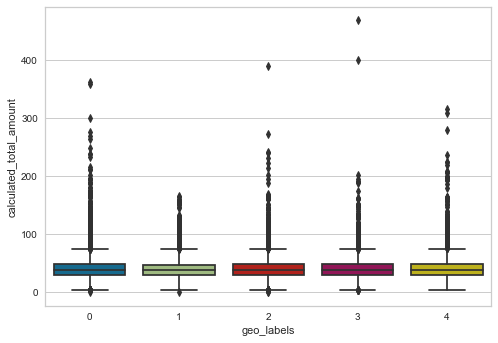

In [35]:
sns.boxplot(combined.geo_labels, combined.calculated_total_amount)
plt.show()

In [36]:
# Statistical Test

model = sfa.ols('calculated_total_amount~geo_labels',data = combined).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
geo_labels,1.0,7.634233e+01,76.342331,0.2078,0.6485
Residual,34998.0,1.285770e+07,367.383849,NaN,NaN


In [37]:
combined.pickup_location_id.value_counts().head(5)  # 138, 132, 230, 161, 162

138    12719
132     3451
230     1642
161     1510
162     1390
Name: pickup_location_id, dtype: int64

In [38]:
combined.dropoff_location_id.value_counts().head(5)

138    5595
230    1242
162    1111
161    1096
13      955
Name: dropoff_location_id, dtype: int64

##### Observations:
* Frequently Trip start cities are - 138,132,230,161,162

**Pickup Location**
* 138 - Queens
* 132 - Queens
* 161 - Manhattan
* 162 - Manhattan

**Dropoff Location**
* 13 - Manhattan

In [39]:
# Importing the file of texi zone codes.

geo_locs = pd.read_csv('taxi_zone_lookup.csv')

In [40]:
# Names of the columns in geo_loc files.

geo_locs.columns

Index(['LocationID', 'Borough', 'Zone', 'service_zone'], dtype='object')

In [41]:
# List of Manhattan city codes
manhattan_list = geo_locs.loc[geo_locs.Borough=='Manhattan','LocationID'].to_list()

# List of Queen city codes
queens_list = geo_locs.loc[geo_locs.Borough=='Queens','LocationID'].to_list()

In [42]:
# Defining function the the pickuplocation is belongs to which city.

def locs(x):
    if x in manhattan_list:
        return ('Manhattan')
    elif x in queens_list:
        return ('Queens')
    else:
        return ('others')

In [43]:
# Creating new feature Location based on pickup location.

combined['locations'] = combined.pickup_location_id.apply(locs)

geo labels for 3 clusters as we have only the 3 category.

In [44]:
# From above we got only 3 type of city , so we check for 3 clusters.

kmeans = KMeans(n_clusters = 3, random_state=42)
labels = kmeans.fit(geo_data)


# Inserting the labels in the data after clustering
combined['geo_labels']=labels.labels_

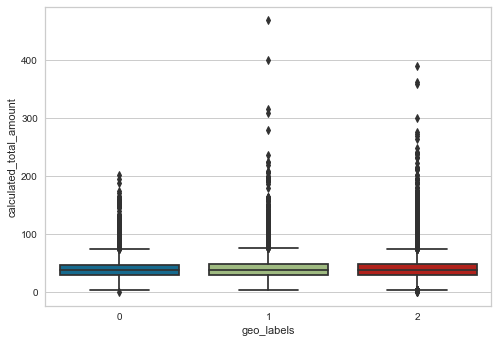

In [45]:
# Plot for geo_labels to verify the effect on target.

sns.boxplot(combined.geo_labels,combined.calculated_total_amount)
plt.show()

In [46]:
# Statistical Test

model = sfa.ols('calculated_total_amount~geo_labels',data = combined).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
geo_labels,1.0,2.125336e+03,2125.335513,5.785976,0.01616
Residual,34998.0,1.285565e+07,367.325303,NaN,NaN


Here p value < 0.05, So we reject the Ho. Thus this feature have an impact on the target variable.

# 

In [47]:
# Clustering on the basis of fare.

# creating the dataset for cluster.
data3 = combined.loc[:,['fare_amount','extra','mta_tax','tip_amount','tolls_amount','imp_surcharge','total_amount']]

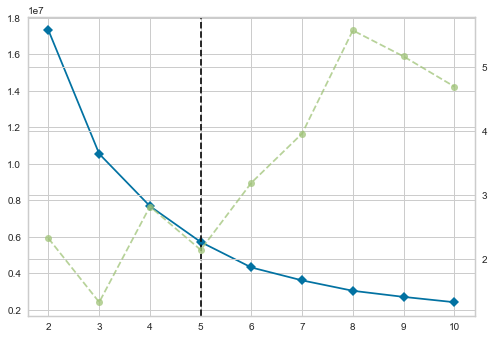

In [48]:
# KMeans Model defining
kmeans = KMeans(random_state = 42)

# Elbow visualizer defining
elbow = KElbowVisualizer(estimator = kmeans,random_state=42)


# Elbow plot for optimal clusters
elbow.fit(data3)
plt.show()

In [49]:
# We got 5 cluster but we go for 3 clusters because fare is between those cities also.

kmeans = KMeans(n_clusters = 3, random_state=42)
labels = kmeans.fit(geo_data)

combined['fare_labels']=labels.labels_

In [50]:
# Statistical Test

model = sfa.ols('calculated_total_amount~fare_labels',data = combined).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
fare_labels,1.0,2.125336e+03,2125.335513,5.785976,0.01616
Residual,34998.0,1.285565e+07,367.325303,NaN,NaN


Here p value < 0.05, So we reject the Ho. Thus this feature have an impact on the target variable.

# 

In [51]:
# Fare per mile

combined['fare_per_mile'] = combined['total_amount']/combined['trip_distance']

In [52]:
# Fare per day

combined['med_fare_per_day'] = combined.groupby('day')['total_amount'].transform('median')
combined['mean_fare_per_day'] = combined.groupby('day')['total_amount'].transform('mean')
combined['std_fare_per_day'] = combined.groupby('day')['total_amount'].transform('std')
combined['min_fare_per_day'] = combined.groupby('day')['total_amount'].transform('min')
combined['max_fare_per_day'] = combined.groupby('day')['total_amount'].transform('max')

In [53]:
# Fare per month

combined['med_fare_per_month'] = combined.groupby('month')['total_amount'].transform('median')
combined['mean_fare_per_month'] = combined.groupby('month')['total_amount'].transform('mean')
combined['std_fare_per_month'] = combined.groupby('month')['total_amount'].transform('std')
combined['min_fare_per_month'] = combined.groupby('month')['total_amount'].transform('min')
combined['max_fare_per_month'] = combined.groupby('month')['total_amount'].transform('max')

# 

In [54]:
# Factorixe the store and fwd flag

combined['store_and_fwd_flag']= pd.factorize(combined.store_and_fwd_flag)[0]

In [55]:
# One Hot Encoding for remaining categorical columns.

combined = pd.get_dummies(combined,drop_first=True)

# 

### Dropping columns

In [56]:
# Creating the data after removing the unneccessory columns for further analysis.

newdata = combined.drop(['fare_amount','extra','mta_tax','tip_amount','tolls_amount','imp_surcharge','pickup_location_id'
               ,'dropoff_location_id','year','month','day','day_of_week','hour_of_day'],axis = 1)

In [57]:
# split the data in train and test

newtrain = newdata.loc[0:train.shape[0]-1,]
newtest = newdata.loc[train.shape[0]:,]

In [60]:
# Removing target from test

newtest = newtest.drop('calculated_total_amount',axis= 1)

In [61]:
# removing outliers

Q1 = newtrain.quantile(0.25)
Q3 = newtrain.quantile(0.75)

iqr = Q3-Q1

lowerlim = Q1-1.5*iqr
upperlim = Q3+1.5*iqr

In [62]:
# Eliminate the outliers
wt_outliers = newtrain.loc[~((newtrain<lowerlim)|(newtrain>upperlim)).any(axis = 1)]

In [63]:
x = wt_outliers.drop('calculated_total_amount',axis=1)
y = wt_outliers.calculated_total_amount

# 

## `Model Building`

In [64]:
# Importing libreries

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score,KFold

In [65]:
# Defining function for run all the model collectively.

def all_models():
    models = {}
    models['lr'] = LinearRegression()
    models['dt'] = DecisionTreeRegressor()
    models['rf'] = RandomForestRegressor()
    models['gb']= GradientBoostingRegressor()
    models['lgbm'] = LGBMRegressor()
    models['xgboost'] = XGBRegressor()
    return models

In [66]:
# Defining the function for finding the performance of the model.

def eval_matric(model):
    cv = KFold(n_splits = 5,shuffle = True, random_state=42)
    score = -cross_val_score(estimator = model,X = x,y = y,scoring = 'neg_root_mean_squared_error',
                            cv = cv,error_score = 'raise',n_jobs = -1)
    return score

In [67]:
# All models and their performance.

models = all_models()
result, names = list(),list()  #---- Defining lists
for name,model in models.items():   #-----fetching the name and model in the models dictionary.
    final_score = eval_matric(model)    #---- rmse score
    result.append(final_score)
    names.append(name)
    print('Model:',name,
          '  score:',round(np.mean(result[-1]),3),
          '  Std:',round(np.std(result[-1]),3))

Model: lr   score: 12.293   Std: 0.143
Model: dt   score: 17.91   Std: 0.293
Model: rf   score: 12.564   Std: 0.148
Model: gb   score: 12.323   Std: 0.136
Model: lgbm   score: 12.438   Std: 0.138
Model: xgboost   score: 12.921   Std: 0.182


#### Linear Regression

In [68]:
# Linear Regression
lr = LinearRegression()


kfold = KFold(n_splits = 5 , shuffle = True, random_state=42)


pred_lr = []

for train_index, test_index in kfold.split(x,y):  # Loop for 5 Kfolds and finding predictions.
    xtrain = x.iloc[train_index]
    ytrain= y.iloc[train_index]
    pred_lr.append(lr.fit(xtrain,ytrain).predict(newtest))
    
pred = pd.DataFrame(pred_lr).T.mean(axis =1 )

In [69]:
# Submission file for Linear Regression

submission['calculated_total_amount']=pred
submission.to_csv('Linear.csv',index = False)      # 20.94

#### Decision Tree

In [70]:
# Decision Tree
dt = DecisionTreeRegressor()

kfold = KFold(n_splits = 5 , shuffle = True, random_state=42)

pred_dt = []
for train_index, test_index in kfold.split(x,y):
    xtrain = x.iloc[train_index]
    ytrain= y.iloc[train_index]
    pred_dt.append(dt.fit(xtrain,ytrain).predict(newtest))
    
pred = pd.DataFrame(pred_dt).T.mean(axis =1 )

In [71]:
# Submission file for Decision Tree

submission['calculated_total_amount']=pred
submission.to_csv('DecisionTree.csv',index = False)  # 20.51

#### Random Forest

In [72]:
# RandomForest
rf = RandomForestRegressor()

kfold = KFold(n_splits = 5 , shuffle = True, random_state=42)

pred_rf = []
for train_index, test_index in kfold.split(x,y):
    xtrain = x.iloc[train_index]
    ytrain= y.iloc[train_index]
    pred_rf.append(rf.fit(xtrain,ytrain).predict(newtest))
    
pred = pd.DataFrame(pred_rf).T.mean(axis =1 )

In [73]:
# Submission file for Random Forest

submission['calculated_total_amount']=pred
submission.to_csv('Randomforest.csv',index = False)  # 19.376

#### Gradient Boosting Regressor

In [74]:
# Gradient Boosting
gbm = GradientBoostingRegressor()

kfold = KFold(n_splits = 5 , shuffle = True, random_state=42)

pred_gbm = []
for train_index, test_index in kfold.split(x,y):
    xtrain = x.iloc[train_index]
    ytrain= y.iloc[train_index]
    pred_gbm.append(gbm.fit(xtrain,ytrain).predict(newtest))
    
pred = pd.DataFrame(pred_gbm).T.mean(axis =1 )

In [75]:
# Submission file for Gradient Boost

submission['calculated_total_amount']=pred
submission.to_csv('Gradient.csv',index = False)  # 19.39

#### Light GBM Regressor

In [76]:
# LGBM
lgbm = LGBMRegressor()

kfold = KFold(n_splits = 5 , shuffle = True, random_state=42)

pred_lgbm = []
for train_index, test_index in kfold.split(x,y):
    xtrain = x.iloc[train_index]
    ytrain= y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain,ytrain).predict(newtest))
    
pred = pd.DataFrame(pred_lgbm).T.mean(axis =1 )

In [77]:
# Submission file for Light GBM

submission['calculated_total_amount']=pred
submission.to_csv('LGBM.csv',index = False)   # 19.374

#### XGBoost

In [78]:
# XGBOOST
xgb = XGBRegressor()

kfold = KFold(n_splits = 5 , shuffle = True, random_state=42)

pred_xgb = []
for train_index, test_index in kfold.split(x,y):
    xtrain = x.iloc[train_index]
    ytrain= y.iloc[train_index]
    pred_xgb.append(xgb.fit(xtrain,ytrain).predict(newtest))
    
pred = pd.DataFrame(pred_xgb).T.mean(axis =1 )

In [79]:
# Submission file for XGBOOST

submission['calculated_total_amount']=pred
submission.to_csv('XGBOOST.csv',index = False)   #19.605

# 

Light GBM is best fit model for our analysis.